In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

# 1.读取训练数据集
data = pd.read_csv(r"WFs1.csv")
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
print(X.shape)

# 1.标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

# 2.构建RF模型
RFC_ = RFC()                               # 随机森林
c = RFC_.fit(X, Y).feature_importances_    # 特征重要性
print("重要性：")
print(c)

# 3. 交叉验证递归特征消除法
selector = RFECV(RFC_, step=1, cv=10)       # 采用交叉验证，每次排除一个特征，筛选出最优特征
selector = selector.fit(X, Y)
X_wrapper = selector.transform(X)          # 最优特征
score =cross_val_score(RFC_ , X_wrapper, Y, cv=10).mean()   # 最优特征分类结果
print(score)
print("最佳数量和排序")
print(selector.support_)                                    # 选取结果
print(selector.n_features_)                                 # 选取特征数量
print(selector.ranking_)                                    # 依次排数特征排序


# 4.递归特征消除法
selector1 = RFE(RFC_, n_features_to_select=3, step=1).fit(X, Y)       # n_features_to_select表示筛选最终特征数量，step表示每次排除一个特征
selector1.support_.sum()
print(selector1.ranking_)                                             # 特征排除排序
print(selector1.n_features_)                                          # 选择特征数量
X_wrapper1 = selector1.transform(X)                                   # 最优特征
score =cross_val_score(RFC_, X_wrapper1, Y, cv=9).mean()
print(score)

# 5.递归特征消除法和曲线图选取最优特征数量
score = []                                                            # 建立列表
for i in range(1, 8, 1):
    X_wrapper = RFE(RFC_, n_features_to_select=i, step=1).fit_transform(X, Y)    # 最优特征
    once = cross_val_score(RFC_, X_wrapper, Y, cv=9).mean()                      # 交叉验证
    score.append(once)                                                           # 交叉验证结果保存到列表
print(max(score), (score.index(max(score))*1)+1)                                 # 输出最优分类结果和对应的特征数量
print(score)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 8, 1), score)
plt.xticks(range(1, 8, 1))
plt.show()










In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
%matplotlib inline

#method used for preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#models used for training/fitting data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

#methods for training and optimizing model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.metrics import average_precision_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score,classification_report 

#methods for resampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
#from imblearn.ensemble import BalanceCascade

#ensemble methods
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

#RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [ ]:
# 1.读取训练数据集
data = pd.read_csv(r"WFs1.csv")
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
print(X.shape)

In [2]:
df = pd.read_excel('./Ponzi.xlsx')
df.head(10)

,address,lifetime,most active,active day,in vs out,num out,num in,num addr received,num addr sent,median delay,mean delay,minimum delay,maximum delay,total received BTC,total sent BTC,avg received BTC,avg sent BTC,48 diff,class
0,1122NYbAT2KkZDZ5TFvGy4D2Ut7eYfx4en,45438921,36,4,0.222222,2,3,10,45,124268,1.514631e+07,70125,45244528,0.485518,0.485618,0.242759,0.161873,6,Normal Instances
1,112cHpSypVzXvv61qAB1S7HocumMGnNdiK,117407951,73,108,1.294872,78,101,267,2645,1336,1.097271e+06,-609,53321953,0.181040,0.185200,0.002321,0.001834,69,Normal Instances
2,1141qLXqx4SBy6FfAGXwgwBe6tRDUsxoa4,11427410,259,52,1.000000,47,47,194,4853,124587,2.240669e+05,19377,4273036,47.228262,47.228262,1.004857,1.004857,-143,Normal Instances
3,1148tsSqptBTH97mG2ZRipZdf8UUwhBWfQ,184298448,147,45,1.000000,36,36,93,2883,137307,4.188601e+06,12608,92990906,10.008190,10.008190,0.278005,0.278005,-143,Normal Instances
4,114BQaYpVNxVosGk99HQmrKSjVt3r6ptTp,1828552,8,2,1.500000,1,1,9,6,1828552,1.828552e+06,1828552,1828552,0.175842,0.175842,0.175842,0.175842,3,Normal Instances
5,114otX2yYNGvHaBeSUWjvHHgTA5bGk6i86,6248673,14,32,1.000000,21,21,84,62,127939,2.015701e+05,0,954883,148.240000,148.240000,7.059048,7.059048,10,Normal Instances
6,115i2xierq98FX3iWmj7yXog4bwQx3ACVg,935578,145,18,2.484848,16,16,246,99,19570,5.503400e+04,1223,344577,0.361319,0.361319,0.022582,0.022582,141,Normal Instances
7,115p7UMMngoj1pMvkpHijcRdfJNXj6LrLn,110738005,119,124,0.302343,112,122,400,1322,4366,9.003090e+05,0,22779852,14.410676,149.900173,0.128667,1.228690,-117,Normal Instances
8,1168Hc7aRi1azJPFRbCMGFvS1Q7R4taiZ3,1952932,67,14,0.126126,7,7,14,111,4559,1.502255e+05,473,1031864,0.084129,0.084129,0.012018,0.012018,-65,Normal Instances
9,11pkP8WevFseavrDBiN5j4YuyZzbJDVZ3,10652483,563,178,3.051724,58,177,390,64007,15453,6.018352e+04,0,2886150,6.380006,14.540751,0.110000,0.082151,-561,Normal Instances


In [3]:
del df['address']
df.head()

,lifetime,most active,active day,in vs out,num out,num in,num addr received,num addr sent,median delay,mean delay,minimum delay,maximum delay,total received BTC,total sent BTC,avg received BTC,avg sent BTC,48 diff,class
0,45438921,36,4,0.222222,2,3,10,45,124268,1.514631e+07,70125,45244528,0.485518,0.485618,0.242759,0.161873,6,Normal Instances
1,117407951,73,108,1.294872,78,101,267,2645,1336,1.097271e+06,-609,53321953,0.181040,0.185200,0.002321,0.001834,69,Normal Instances
2,11427410,259,52,1.000000,47,47,194,4853,124587,2.240669e+05,19377,4273036,47.228262,47.228262,1.004857,1.004857,-143,Normal Instances
3,184298448,147,45,1.000000,36,36,93,2883,137307,4.188601e+06,12608,92990906,10.008190,10.008190,0.278005,0.278005,-143,Normal Instances
4,1828552,8,2,1.500000,1,1,9,6,1828552,1.828552e+06,1828552,1828552,0.175842,0.175842,0.175842,0.175842,3,Normal Instances


In [4]:
def get_day(x):
    day_second = 60*60*24
    return int(x/day_second)

In [5]:
df['lifetime'] = df['lifetime'].map(get_day)

df['median delay'] = df['median delay'].map(get_day)

df['minimum delay'] = df['minimum delay'].map(get_day)

df['maximum delay'] = df['maximum delay'].map(get_day)

df['mean delay'] = df['mean delay'].map(get_day)

In [6]:
X = df.iloc[:, df.columns != 'class']
y = df.iloc[:, df.columns == 'class']

In [7]:
X = MinMaxScaler().fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

In [9]:
rfc = RandomForestClassifier(
    n_estimators=100,                    
    class_weight=None,
    min_samples_leaf=3,
)

In [10]:
c = rfc.fit(X_train,y_train).feature_importances_
print("重要性：")
print(c)

重要性：
[0.04124021 0.03540031 0.05699213 0.18482045 0.03750681 0.04413302
 0.05653026 0.03202245 0.00813128 0.01592047 0.00782443 0.03518227
 0.05383928 0.06812965 0.16005593 0.12605856 0.03621248]


Text(0.5, 0, 'Random Forest Feature Importance with SMOTE')

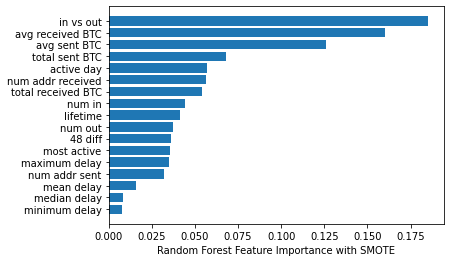

In [12]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], c[sorted_idx])
plt.xlabel("Random Forest Feature Importance with SMOTE")

In [16]:
# 3. 交叉验证递归特征消除法
selector = RFECV(rfc, step=1, cv=10)       # 采用交叉验证，每次排除一个特征，筛选出最优特征
selector = selector.fit(X_train,y_train)
X_wrapper = selector.transform(X_train)          # 最优特征
score =cross_val_score(rfc , X_wrapper, y_train, cv=10).mean()   # 最优特征分类结果
print(score)
print("最佳数量和排序")
print(selector.support_)                                    # 选取结果
print(selector.n_features_)                                 # 选取特征数量
print(selector.ranking_)                                    # 依次排数特征排序

0.8699693396602388
最佳数量和排序
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
17
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


0.8709471676645189 9
[0.7927343158265425, 0.8323285433559698, 0.8261352093240683, 0.8546528235316071, 0.8585624134863868, 0.8637772734689034, 0.8707844873824695, 0.8667105424956782, 0.8709471676645189, 0.8691552922048872, 0.8706218071004201, 0.8707840089110517, 0.8691550529691784, 0.8688284962265351, 0.8698067310402113, 0.8704581698755353]


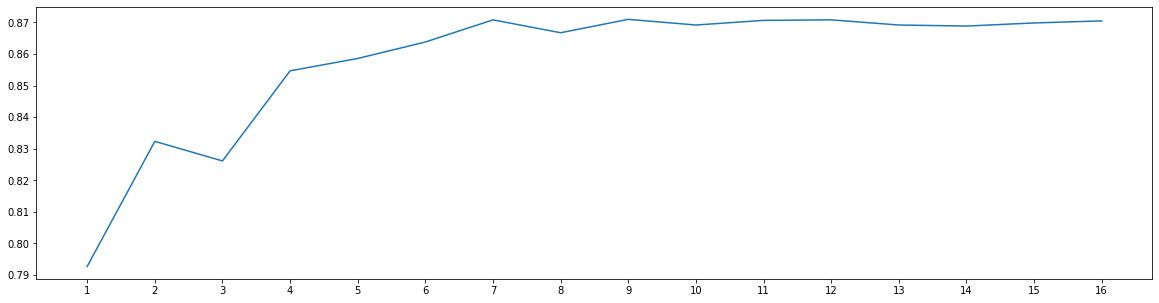

In [19]:
# 5.递归特征消除法和曲线图选取最优特征数量
score = []                                                            # 建立列表
for i in range(1, 17, 1):
    X_wrapper = RFE(rfc, n_features_to_select=i, step=1).fit_transform(X_train, y_train)    # 最优特征
    once = cross_val_score(rfc, X_wrapper, y_train, cv=9).mean()                      # 交叉验证
    score.append(once)                                                           # 交叉验证结果保存到列表
print(max(score), (score.index(max(score))*1)+1)                                 # 输出最优分类结果和对应的特征数量
print(score)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 17, 1), score)
plt.xticks(range(1, 17, 1))
plt.show()

0.8724141610314695 16
[0.7371679946640868, 0.8334687407445684, 0.830210111153695, 0.8520446758332221, 0.8595416052428984, 0.86573278615342, 0.8694811312404036, 0.8694811312404036, 0.8701323308400188, 0.8681772966269201, 0.8702959680649037, 0.8698069702759201, 0.8707844873824695, 0.8683387807304249, 0.8702952503577771, 0.8724141610314695]


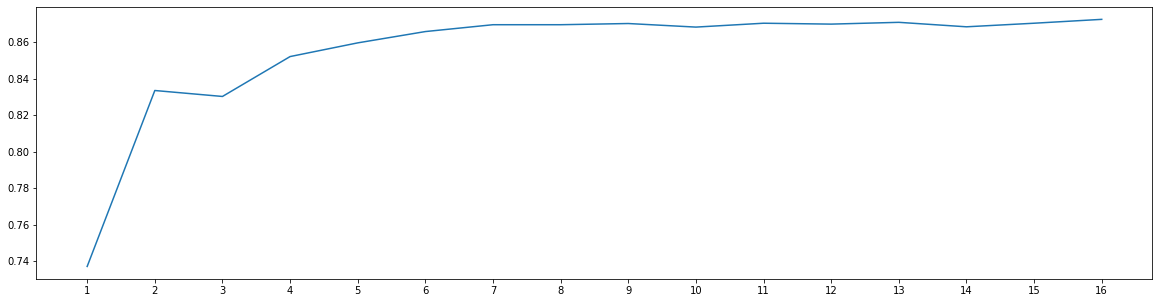

In [25]:
# 5.递归特征消除法和曲线图选取最优特征数量
score = []                                                            # 建立列表
for i in range(1, 17, 1):
    X_wrapper = RFE(rfc, n_features_to_select=i, step=1).fit_transform(X_train, y_train)    # 最优特征
    once = cross_val_score(rfc, X_wrapper, y_train, cv=9,scoring='accuracy').mean()                      # 交叉验证
    score.append(once)                                                           # 交叉验证结果保存到列表
print(max(score), (score.index(max(score))*1)+1)                                 # 输出最优分类结果和对应的特征数量
print(score)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 17, 1), score)
plt.xticks(range(1, 17, 1))
plt.show()

In [ ]:
#AIC=2*k+nln(SSR/n)

In [ ]:
# 2.构建RF模型
RFC_ = RFC()                               # 随机森林
c = RFC_.fit(X, Y).feature_importances_    # 特征重要性
print("重要性：")
print(c)

In [20]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv

In [21]:
help(cross_validate)

Help on function cross_validate in module sklearn.model_selection._validation:

cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score=nan)
    Evaluate metric(s) by cross-validation and also record fit/score times.
    
    Read more in the :ref:`User Guide <multimetric_cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the data